___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 8</p><h1>

 # Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

### Causes of Outliers

- Data entries errors
- FirstMeasurement errors or instrument errors
- Sampling errors
- Data processing error
- Natural novelties in data

### Guideline for Handling Outliers

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## Catching and Detecting Outliers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


**info about dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

### Detecting Outliers with Graphs

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='table'>

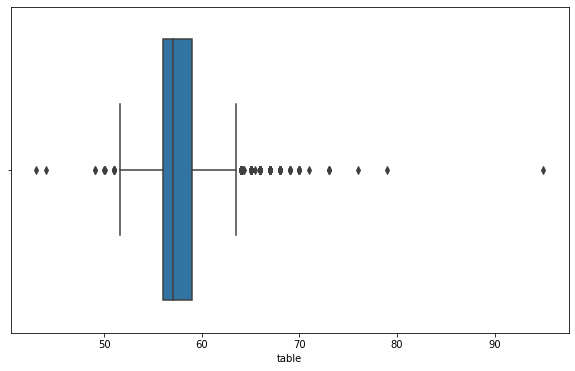

In [6]:
# you don't need to know how this plotting happens.
# just focus on quarters
# remember Statistics lesson IQR

plt.figure(figsize = (10, 6))
sns.boxplot(x = df.table)

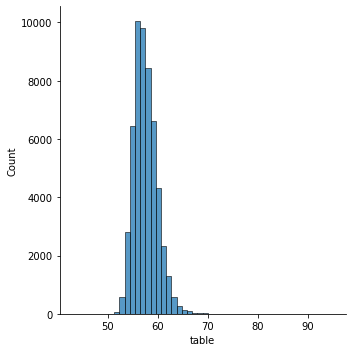

In [8]:
sns.displot(df.table, bins = 50, kde = False)

In [9]:
df["table"].sort_values()

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

### Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [10]:
df["table"].quantile(0.25)

56.0

In [11]:
df["table"].quantile(0.75)

59.0

In [12]:
Q1 = df["table"].quantile(0.25)
Q3 = df["table"].quantile(0.75)
IQR = Q3-Q1

In [13]:
Q1

56.0

In [14]:
Q3

59.0

In [15]:
IQR

3.0

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

In [16]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [17]:
df.table.describe()[4]

56.0

In [18]:
Q1 - (1.5 * IQR)

51.5

In [14]:
Q3 + (1.5 * IQR)

63.5

In [19]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [20]:
lower_lim

51.5

In [21]:
upper_lim

63.5

In [25]:
(df.table < lower_lim).sum()

16

In [26]:
(df.table > upper_lim).sum()

589

In [27]:
df.table[(df.table < lower_lim) | (df.table > upper_lim)].count()

605

In [28]:
df.table[~((df.table < lower_lim) | (df.table > upper_lim))].count()

53335

In [29]:
df.table[(df.table >= lower_lim) & (df.table <= upper_lim)].count()

53335

## Removing the Outliers

### First way

In [30]:
not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)

In [31]:
df.table[not_outliers].count()

53335

In [32]:
len(df[not_outliers])

53335

In [33]:
cleaned_df = df[not_outliers]

In [34]:
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Second way

In [35]:
 df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [36]:
outlier_index = df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

In [37]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='table'>

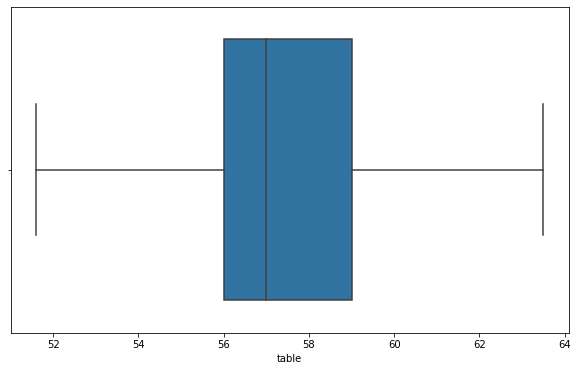

In [38]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = cleaned_df.table)

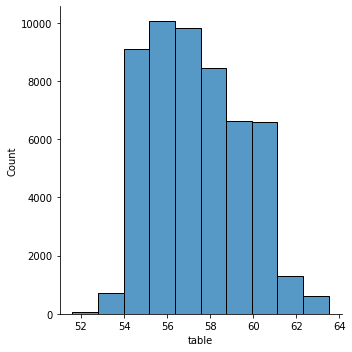

In [41]:
sns.displot(cleaned_df.table, bins = 10, kde = False)

In [42]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [43]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## Limitation and Transformation of the Outliers

### Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively.

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [44]:
from scipy.stats.mstats import winsorize

In [45]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [46]:
winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [47]:
a = len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [48]:
b = len(df.table[df.table>upper_lim])/len(df.table)
b

0.010919540229885057

In [49]:
table_win = winsorize(df.table, (a, b))

<IPython.core.display.Javascript object>

<AxesSubplot:>

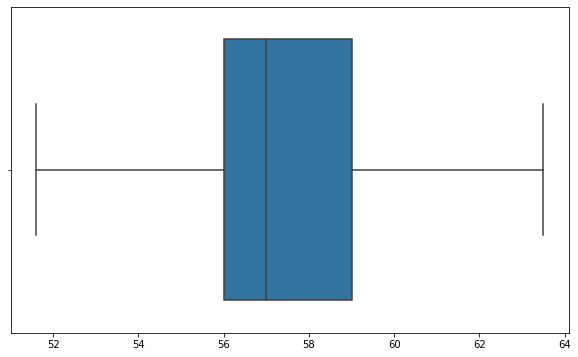

In [50]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = table_win)

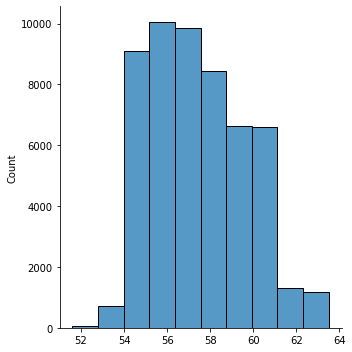

In [51]:
sns.displot(table_win, bins = 10, kde =False)

In [52]:
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [53]:
df_table_win = pd.Series(table_win)

In [54]:
df_table_win.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

In [55]:
upper_lim, lower_lim

(63.5, 51.5)

In [56]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [57]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [48]:
df_table_win.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [58]:
df_table_win[df_table_win == 51.6].count()

17

In [59]:
df_table_win[df_table_win == 63.5].count()

590

### ``log()`` Transformation

The Numpy.log() method lets you calculate the mathematical log of any number or array.
The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.

https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


In [61]:
df["carat"]

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='carat'>

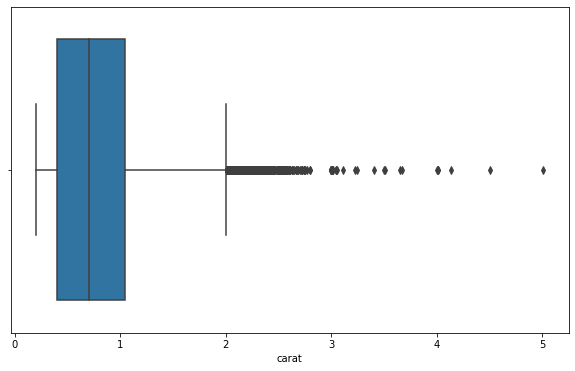

In [62]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df.carat)

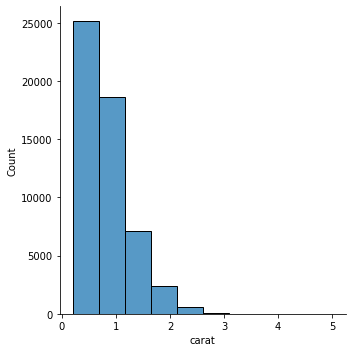

In [63]:
sns.displot(df.carat, bins = 10, kde = False)

In [64]:
np.log(df.carat)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='carat'>

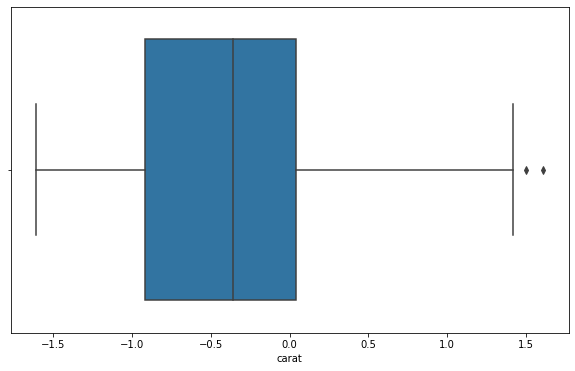

In [65]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = np.log(df.carat))

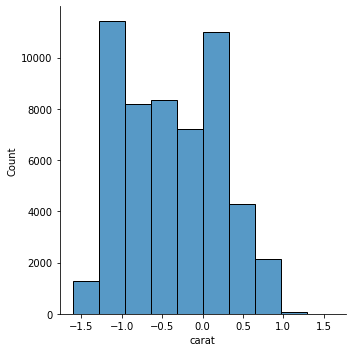

In [66]:
sns.displot(np.log(df.carat),  bins = 10, kde = False)

In [67]:
df["carat_log"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


### removing after log transformation

In [68]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)
IQR = Q3-Q1

In [69]:
Q1

-0.916290731874155

In [70]:
Q3

0.03922071315328133

In [71]:
IQR

0.9555114450274363

In [72]:
lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

In [73]:
lower_lim

-2.3495578994153097

In [74]:
upper_lim

1.472487880694436

In [66]:
(df.carat_log < lower_lim).value_counts()

False    53940
Name: carat_log, dtype: int64

In [75]:
(df.carat_log > upper_lim).sum()

2

In [77]:
(df.carat_log <= lower_lim).sum()

0

In [78]:
df.loc[(df.carat_log > upper_lim)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [79]:
outlier_index = df.loc[(df.carat_log > upper_lim)].index
outlier_index

Int64Index([27415, 27630], dtype='int64')

In [80]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [81]:
not_outliers = (df.carat_log <= upper_lim)

In [82]:
len(df[not_outliers])

53938

In [83]:
cleaned_df = df[not_outliers]

In [84]:
cleaned_df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823
